Module 3 Assignment - Part 2: Use TF/Keras to Create a CNN
---

Use the Fashion MNIST **OR** Digits MNIST dataset here. This time, create a CNN in TF/Keras. Just like in Part 1, you will have Python code and you will create a Word Doc that fully illustrates your model, outcomes, data, accuracies, vis, etc.

**Code Hint:** 
<https://gatesboltonanalytics.com/?page_id=898>

# Requirements:

- Use the `Sequential` Model
- Have at least (more is fine) two `Conv2D` layers with all the needed parameters, shapes, number of filters, and activation.
- Have at least two `MaxPooling` layers
- You will need at least one `Flatten` Layer and one `Dense` Layer.
- Use the appropriate loss function, optimizer, and metrics.
- Illustrate your raw data, at least one image of what your training data looks like as a matrix and as an image. (The matrix may be large - so you can make it small or use a portion of it). Illustrate data sizes so that I know that you know the sizes of your training data, your testing data, etc.
- Include the first two and last two epoch runs.
- Include a visualization for the Loss over all epochs.
- Include a confusion matrix.

The goals here are to learn to use Keras to build a CNN Model to learn and then predict image data. It is also important to understand shapes and sizes of images, filters, etc. As you do this, make sure that you understand what you are coding and that you illustrate it (on the Word Doc) for the reader to see what you did and confirm that you know what you did :).

---



In [1]:
#libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import seaborn as sns

2023-12-01 00:16:09.865346: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-01 00:16:09.922807: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Data

## Load Data
(Using Digits MNIST again)

In [2]:
Data = tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = Data.load_data()

## Quick EDA

In [3]:
X_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

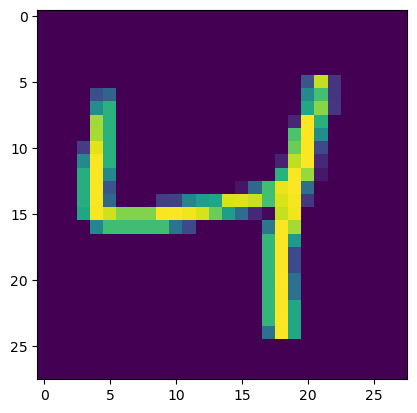

In [4]:
plt.imshow(X_train[2])

In [5]:
y_train[0]

5

In [6]:
print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)
print("X_test shape:",X_test.shape)
print("y_test shape:",y_test.shape)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


(See Part1 for more extensive EDA and detailed info about Min-Max normalization formula simplification.)

In [7]:
# Min-max normalize data
assert X_train.min() == 0   # the following min-max normlization is only effective if the minimum value in the data is zero

# min-max scale from 0 to 1 (as long as original min value was zero)
X_train, X_test = X_train/X_train.max(), X_test/X_train.max()

# Model

**Reminder of model requirements:**

- Use the `Sequential` Model
- Have at least two `Conv2D` layers with all the needed parameters, shapes, number of filters, and activation.
- Have at least two `MaxPooling` layers
- You will need at least `Flatten` Layer and one `Dense` Layer.
- Use the appropriate loss function, optimizer, and metrics.
- Include the first two and last two epoch runs.
- Include a visualization for the Loss over all epochs
- Include a confusion matrix

## Build Model

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(28,3,activation='relu',input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2))
])

model.add(layers.Conv2D(36,2,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 36)        4068      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 36)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1296)              0         
                                                                 
 dense (Dense)               (None, 10)                1

2023-12-01 00:16:14.588318: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: UNKNOWN ERROR (100)


In [9]:
# Compile model
adam = tf.keras.optimizers.legacy.Adam(learning_rate = 0.001)
# for some reason, if I don't use the code above I get a "Graph Execution Error" 
# when I try to train the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=["accuracy"],
                 optimizer= adam
                 )

## Train Model

In [10]:
hist = model.fit(X_train,y_train, epochs=10, validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.2074 - accuracy: 0.9369 - val_loss: 0.0721 - val_accuracy: 0.9780
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0698 - accuracy: 0.9792 - val_loss: 0.0569 - val_accuracy: 0.9819
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0522 - accuracy: 0.9836 - val_loss: 0.0552 - val_accuracy: 0.9823
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0417 - accuracy: 0.9869 - val_loss: 0.0534 - val_accuracy: 0.9823
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0347 - accuracy: 0.9893 - val_loss: 0.0377 - val_accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0291 - accuracy: 0.9906 - val_loss: 0.0437 - val_accuracy: 0.9863
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0248 - accuracy: 0.9922 - val_loss: 0.0354 -

## Evaluate Model

### Loss & Accuracy vs. Epochs plots

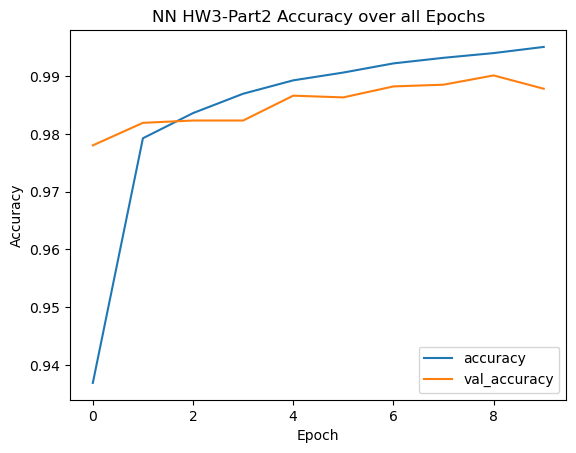

In [11]:
# Accuracy plot
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("NN HW3-Part2 Accuracy over all Epochs")

#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

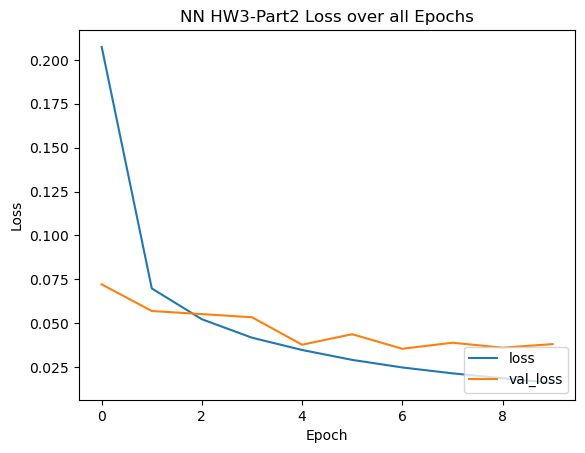

In [12]:
# Loss plot
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("NN HW3-Part2 Loss over all Epochs")
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [13]:
Eval_Loss, Eval_Accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0381 - accuracy: 0.9878


### Test Model with predictions

In [14]:
pred = model.predict(X_test)

313/313 [==============================] - 3s 8ms/step


In [15]:
# Preview results
i = 5   # index to check
print("Prediction for X_test[{}]:".format(i),pred[i])
print("\n ArgMax (final prediction) for X_test[{}]:".format(i),np.argmax(pred[i]))
print("\n Label for X_test[{}] (y_test[{}]):".format(i,i), y_test[i])

Prediction for X_test[5]: [ -7.5954256    9.52089     -4.443288   -10.216774     0.80025744
  -8.329813    -8.913565     0.45117837  -0.8174785   -4.911473  ]

 ArgMax (final prediction) for X_test[5]: 1

 Label for X_test[5] (y_test[5]): 1


### Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix: NN HW3-Part 1')

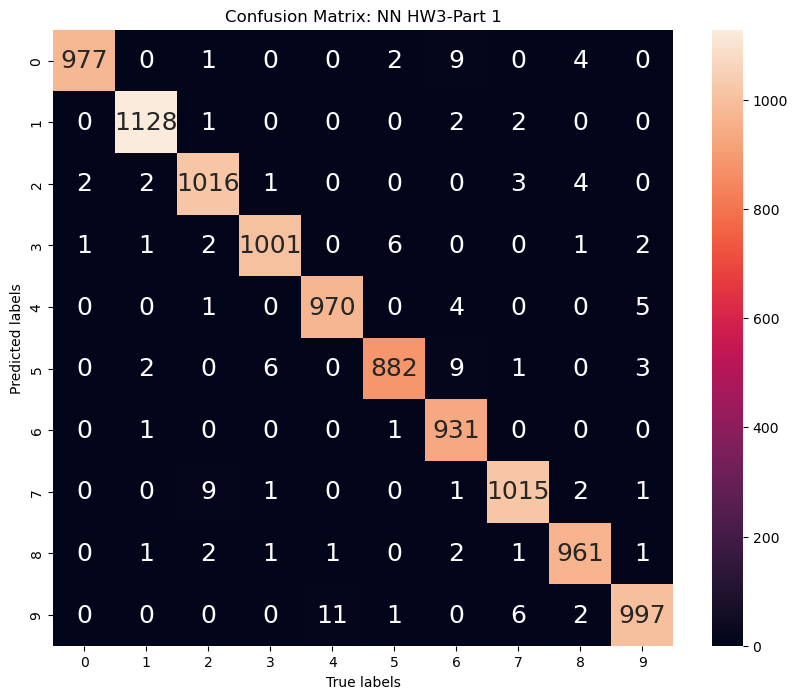

In [16]:
#final predictions
final_pred = np.squeeze(np.array(pred.argmax(axis=1)))   # final prediction (arg-max of pred)

#confusion matrix
cm = confusion_matrix(final_pred,y_test)

#plot
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(cm, annot=True, fmt='g', ax=ax, annot_kws={'size': 18})
ax.set_xlabel('True labels') 
ax.set_ylabel('Predicted labels')
ax.set_title('Confusion Matrix: NN HW3-Part 1') 